In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
from copy import deepcopy
import matplotlib as plt
import matplotlib.pyplot as plt
from  matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,6)
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import datetime as dt
import warnings
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
# Charger les données
df = pd.read_csv('Camp_Market_Updated2.csv')

# Afficher le nombre de clients
print("Nombre de clients :", df.shape[0])

# Liste des colonnes numériques à standardiser (en excluant la colonne cible)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('AcceptedCampaign')

print("Colonnes numériques à standardiser :", numeric_cols)

Nombre de clients : 2240
Colonnes numériques à standardiser : ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedThirdCampaign', 'AcceptedFourthCampaign', 'AcceptedFifthCampaign', 'AcceptedFirstCampaign', 'AcceptedSecondCampaign', 'Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedLastCampaign', 'Age', 'Total_Spent', 'Children', 'family_size', 'is_parent', 'customer_for']


In [20]:
# Identifier les colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Appliquer le préprocessing et créer un DataFrame encodé
X = preprocessor.fit_transform(df.drop('AcceptedCampaign', axis=1))
y = df['AcceptedCampaign']

In [21]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

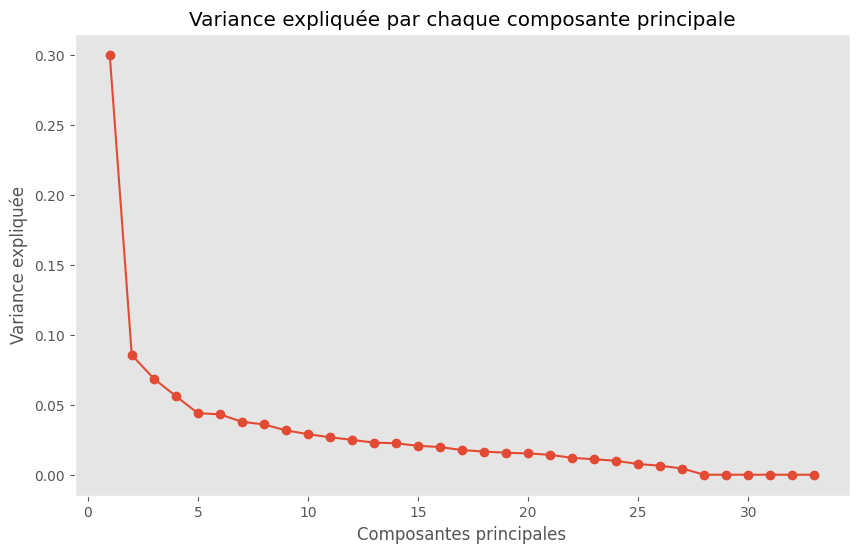

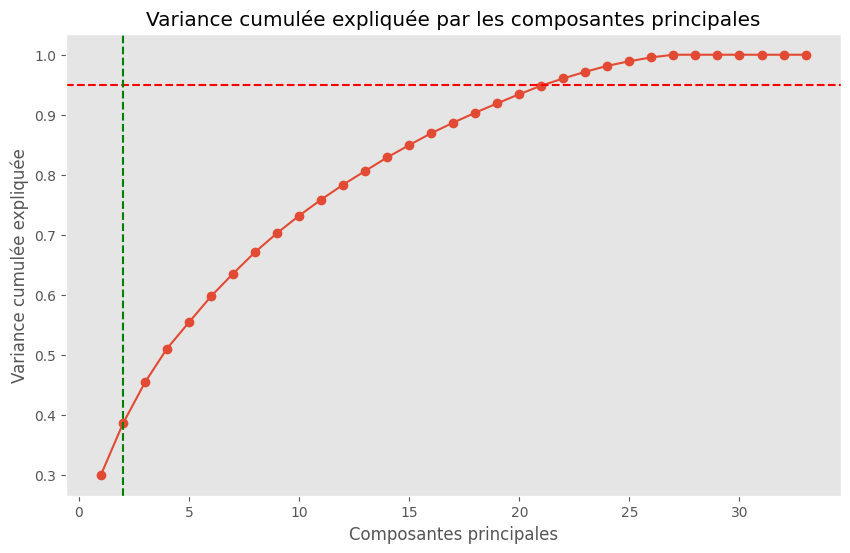

In [22]:
# Appliquer PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualiser la variance expliquée par chaque composante
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.grid()
plt.show()

# Variance expliquée cumulée
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=2, color='g', linestyle='--')
plt.show()

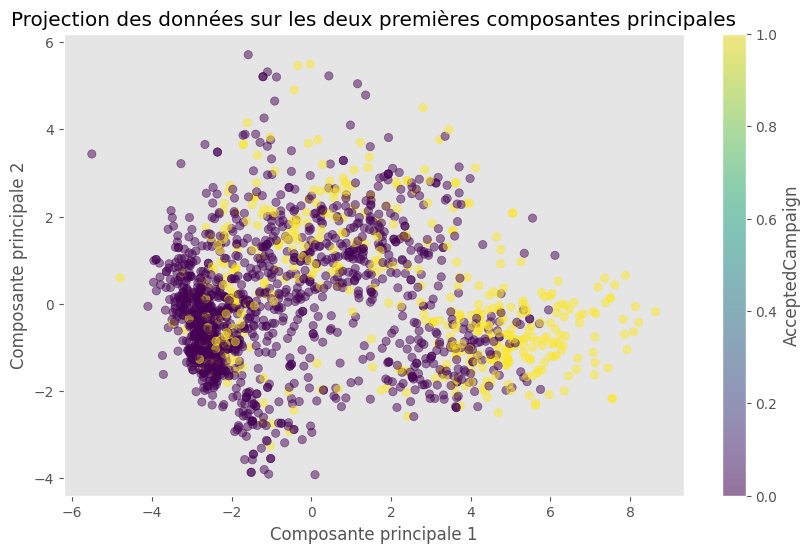

In [23]:
# Tracer les deux premières composantes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='AcceptedCampaign')
plt.grid()
plt.show()

In [24]:
# Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Prédire avec le modèle
y_pred = model.predict(X_test_pca)

In [26]:
# Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Prédire avec le modèle
y_pred = model.predict(X_test_pca)

In [27]:
# Rapport de classification détaillé
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Compter le nombre de clients (0) et non-clients (1) de la campagne marketing
clients = conf_matrix[0, 0]
non_clients = conf_matrix[1, 1]
print(f"Nombre de clients : {clients}, Nombre de non-clients : {non_clients}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       134

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

Matrice de confusion :
[[314   0]
 [  0 134]]
Nombre de clients : 314, Nombre de non-clients : 134
